Title: Sequence Learning Tasks
Author: Thomas Breuel
Institution: UniKL

In [45]:

import urllib2

In [2]:
default_n = 29
default_ninput = 2

Here is a number of sequence prediction tasks. For each of them...

- think about how you would solve them at all
- how you would learn them with a dedicated machine learning algorithm
- how an AR and MA model would solve them
- what kind of complexity learning might have

# Non-Sequence Tasks

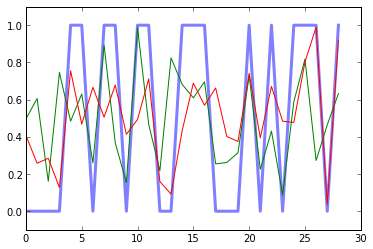

In [17]:
def generate_threshold(n=default_n,ninput=default_ninput,threshold=0.5,example=0):
    "No temporal dependencies, just threshold of the sum of the inputs."
    x = rand(n,ninput)
    y = 1.0*(sum(x,axis=1)>threshold*ninput).reshape(n,1)
    return x,y

x,y = generate_threshold()
ylim([-.1,1.1]); plot(y,linewidth=3,alpha=0.5); plot(x)

# Sequence Generation Tasks

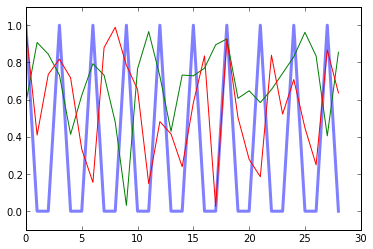

In [18]:
def generate_mod(n=default_n,ninput=default_ninput,m=3,example=0):
    "Generate a regular beat every m steps. The input is random."
    x = rand(n,ninput)
    y = 1.0*(arange(n,dtype='i')%m==0).reshape(n,1)
    return x,y
x,y = generate_mod()
ylim([-.1,1.1]); plot(y,linewidth=3,alpha=0.5); plot(x)

Generalization:

- periodic function generator
- pattern generator with triggers

# Counting Tasks

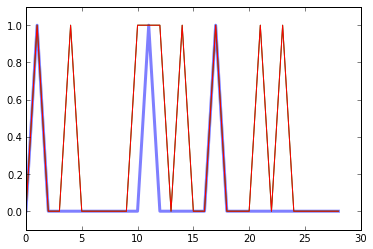

In [22]:
def generate_imod(n=default_n,ninput=default_ninput,m=3,p=0.2,example=0):
    """Generate an output for every m input pulses."""
    if example:
        x = array(arange(n)%4==1,'i')
    else:
        x = array(rand(n)<p,'i')
    y = (add.accumulate(x)%m==1)*x*1.0
    x = array(vstack([x]*ninput).T,'f')
    y = y.reshape(len(y),1)
    return x,y
x,y = generate_imod()
ylim([-.1,1.1]); plot(y,linewidth=3,alpha=0.5); plot(x)

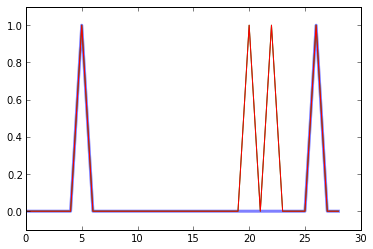

In [25]:
def generate_smod(n=default_n,ninput=default_ninput,m=3,r=0.5,example=0):
    """Generate an output for every m input pulses. The input
    is band limited, so it's a little easier than generate_imod."""
    x = rand(n)
    x = filters.gaussian_filter(x,r)
    x = (x>roll(x,-1))*(x>roll(x,1))
    y = (add.accumulate(x)%m==1)*x*1.0
    x = array(vstack([x]*ninput).T,'f')
    y = y.reshape(len(y),1)
    return x,y
x,y = generate_imod()
ylim([-.1,1.1]); plot(y,linewidth=3,alpha=0.5); plot(x)

(sum/product problem)

Input consists of two sequences:

- value sequence (values in $[-1,1]$)
- marker sequence

Output:

- sum of the values marked by the marker sequence
- product of the values marked by the marker sequence

# Language Recognition Tasks

In [34]:
def generate_anbn(ninput=default_ninput,n=default_n,k=default_n//3,example=0):
    """A simple detector for a^nb^n. Note that this does not
    train the network to distinguish this langugage from other languages."""
    inputs = zeros(n)
    outputs = zeros(n)
    if example:
        l = n//3
    else:
        l = 1+int((k-1)*rand())
    inputs[:l] = 1
    outputs[2*l] = 1
    outputs = outputs.reshape(len(outputs),1)
    return vstack([inputs]*ninput).T,outputs

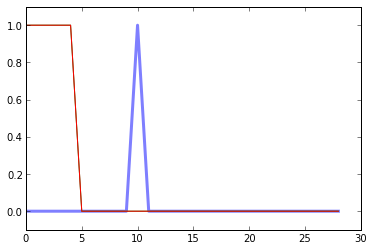

In [35]:
x,y = generate_anbn()
ylim([-.1,1.1]); plot(y,linewidth=3,alpha=0.5); plot(x)

General symbol coding (input or output)

- unary coding: if there are $n$ symbols, the vector is $n+1$ dimensional
- symbol $i$ is represented as a vector that is all $0$, except for entry $1$
- this is the same way we represent classes in other neural network classification problems

Other language recognition tasks:

- Reber grammar
- embedded Reber grammar
- $a^nb^n$ - context free language
- $a^mb^nB^nA^m$ - embedded counters, context free
- $a^nb^nc^n$ - context sensitive language
- long time lag probem $x,a_1,...,a_n,x$ vs $y,a_1,...,a_n,y$
- simple 2 sequence problem: $a_1,a_2,...,a_N$ signal followed by $t$ noise elements
- temporal order ` .*A.*B.*` vs `.*B.*A.*`


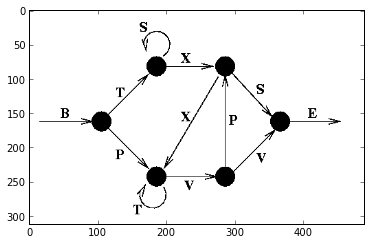

In [49]:
imshow(imread("reber.png"),cmap=cm.gray)

What does "learning" actually mean?

- training strings of length less than 100
- testing strings of up to length 1000

Tests may mean one of several things:

- detect when the language is accepted
- take an entire input sequence and output TRUE/FALSE

Does it generalize?

Claim: LSTM networks learn non-regular languages

Discuss...

# Timing Tasks

In [37]:
def generate_timing(ninput=default_ninput,n=default_n,t=5,example=0):
    """A simple timing related task: output a spike if no spike occurred within
    t time steps before."""
    x = 0
    inputs = []
    while x<n:
        inputs.append(x)
        x += max(1,0.5*t*randn()+t)
    inputs = [-999990]+inputs
    outputs = []
    for i in range(1,len(inputs)):
        if inputs[i]-inputs[i-1]>t:
            outputs.append(inputs[i])
    inputs = inputs[1:]
    xs = zeros((n,ninput))
    xs[inputs,:] = 1.0
    ys = zeros((n,1))
    ys[outputs,:] = 1.0
    return xs,ys

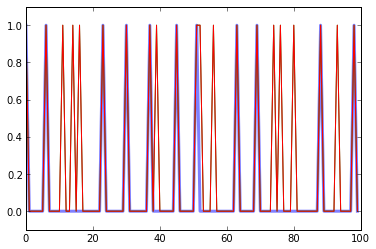

In [39]:
x,y = generate_timing(n=100)
ylim([-.1,1.1]); plot(y,linewidth=3,alpha=0.5); plot(x)

In [40]:
def generate_revtiming(ninput=default_ninput,n=default_n,t=5,example=0):
    """A simple timing related task: output a spike if no spike occurs within
    t time steps after. This cannot be learned using a causal model (it requires
    a reverse model)."""
    x = 0
    inputs = []
    while x<n:
        inputs.append(x)
        x += max(1,0.5*t*randn()+t)
    inputs = inputs+[999999]
    outputs = []
    for i in range(len(inputs)-1):
        if inputs[i+1]-inputs[i]>t:
            outputs.append(inputs[i])
    inputs = inputs[:-1]
    xs = zeros((n,ninput))
    xs[inputs,:] = 1.0
    ys = zeros((n,1))
    ys[outputs,:] = 1.0
    return xs,ys

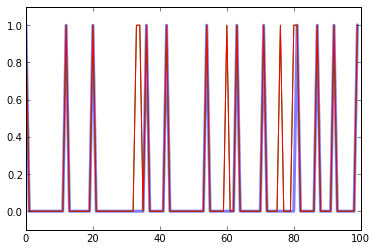

In [41]:
x,y = generate_revtiming(n=100)
ylim([-.1,1.1]); plot(y,linewidth=3,alpha=0.5); plot(x)

In [42]:
def generate_biditiming(ninput=default_ninput,n=default_n,t=5,example=0):
    """Like generate_timing and generate_revtiming combined. Requires
    bidirectional training."""
    x = 0
    inputs = []
    while x<n:
        inputs.append(x)
        x += max(1,0.5*t*randn()+t)
    inputs = [-999999]+inputs+[999999]
    outputs = []
    for i in range(1,len(inputs)-1):
        if inputs[i+1]-inputs[i]>=t and inputs[i]-inputs[i-1]>=t:
            outputs.append(inputs[i])
    inputs = inputs[1:-1]
    xs = zeros((n,ninput))
    xs[inputs,:] = 1.0
    ys = zeros((n,1))
    ys[outputs,:] = 1.0
    return xs,ys

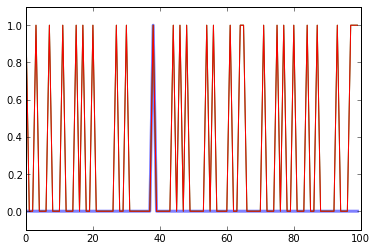

In [43]:
x,y = generate_biditiming(n=100)
ylim([-.1,1.1]); plot(y,linewidth=3,alpha=0.5); plot(x)

Other examples:

- measuring spike delays, discriminate a delay of $t_0$ from $t_0+1$
- more generally, detect any delay $t_0+t_d$ where $t_d$ is from some set of delays
- generalizing timing spikes: the input is $t_d$, the output is a corresponding spike delay